<a href="https://colab.research.google.com/github/cahmtoledo/CompIV-CCM-EPsCah/blob/master/EP5_Cah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questão 1: Vamos implementar o algoritmo metrópolis da seguinte forma:

1) Começamos em uma posição aleatória, escolhemos Norte, Sul, Leste ou Oeste com mesma probabilidade, caso saia do tabuleiro fica no lugar

2) Seguindo a tabela Prob2 decidimos se o movimento será feito ou se vamos ficar no lugar

3) No exemplo abaixo nós geramos 100000 tabuleiros com 100 passos de história

In [115]:
import random

In [116]:
P=[[1/2,1/4,0,1/4,0,0,0,0,0],
   [1/4,1/4,1/4,0,1/4,0,0,0,0],
   [0,1/4,1/2,0,0,1/4,0,0,0],
   [1/4,0,0,1/4,1/4,0,1/4,0,0],
   [0,1/4,0,1/4,0,1/4,0,1/4,0],
   [0,0,1/4,0,1/4,1/4,0,0,1/4],
   [0,0,0,1/4,0,0,1/2,1/4,0],
   [0,0,0,0,1/4,0,1/4,1/4,1/4],
   [0,0,0,0,0,1/4,0,1/4,1/2]]

In [117]:
Prob2=[[1,1,0,1,0,0,0,0,0],
   [1,1,1,0,1,0,0,0,0],
   [0,1,1,0,0,1,0,0,0],
   [1,0,0,1,1,0,1,0,0],
   [0,1/8,0,1/8,0,1/8,0,1/8,0],
   [0,0,1,0,1,1,0,0,1],
   [0,0,0,1,0,0,1,1,0],
   [0,0,0,0,1,0,1,1,1],
   [0,0,0,0,0,1,0,1,1]]

In [118]:
def move(position, probability):
  for i in range(9):
    if probability<P[position][i]:
      if random.random()<=Prob2[position][i]:
        return i
      else:
        return position
    else:
      probability-=P[position][i]
  return -1

In [119]:
hist =[]
def history():
  posicao = random.randint(0,8)
 
  for i in range(100):
    posicao=move(posicao, random.random())
  return posicao
for i in range(100000):
  hist.append(history())

In [120]:
import matplotlib.pyplot as plt


In [121]:
print(hist)

[4, 1, 4, 8, 4, 4, 4, 3, 4, 4, 8, 2, 0, 4, 4, 0, 6, 3, 5, 4, 4, 4, 8, 1, 2, 6, 4, 4, 7, 4, 1, 4, 2, 4, 3, 4, 8, 8, 7, 8, 4, 4, 4, 4, 7, 4, 3, 5, 4, 4, 4, 5, 6, 4, 5, 1, 4, 4, 6, 0, 4, 6, 4, 3, 5, 4, 6, 4, 4, 4, 0, 6, 4, 4, 4, 3, 6, 4, 4, 4, 5, 4, 4, 0, 4, 4, 3, 4, 4, 7, 4, 7, 6, 2, 4, 4, 5, 1, 5, 8, 4, 5, 0, 6, 0, 6, 5, 6, 4, 6, 5, 1, 4, 0, 4, 4, 8, 4, 7, 4, 7, 4, 7, 4, 2, 1, 4, 6, 4, 2, 5, 4, 4, 4, 4, 5, 4, 4, 4, 0, 2, 2, 1, 8, 4, 3, 4, 4, 4, 4, 4, 8, 4, 4, 4, 4, 6, 7, 7, 4, 8, 4, 6, 4, 3, 4, 0, 3, 4, 8, 4, 4, 4, 3, 5, 5, 5, 1, 4, 4, 4, 5, 6, 8, 7, 4, 1, 6, 4, 4, 8, 4, 4, 3, 4, 4, 4, 0, 3, 2, 4, 8, 0, 4, 5, 4, 4, 0, 4, 1, 4, 4, 6, 6, 4, 5, 4, 4, 4, 3, 2, 8, 4, 4, 8, 2, 4, 7, 7, 4, 4, 1, 4, 4, 4, 4, 0, 4, 4, 7, 4, 5, 4, 4, 1, 4, 0, 4, 3, 4, 4, 4, 6, 0, 8, 3, 8, 2, 4, 7, 4, 4, 7, 4, 4, 4, 4, 4, 4, 0, 8, 4, 0, 0, 4, 4, 4, 3, 5, 3, 4, 2, 2, 4, 2, 8, 8, 4, 1, 8, 7, 4, 5, 1, 4, 4, 5, 4, 7, 4, 4, 0, 6, 5, 4, 4, 5, 4, 4, 2, 0, 1, 4, 4, 4, 4, 0, 5, 4, 4, 4, 4, 4, 7, 7, 0, 8, 4, 0, 0, 4, 3, 8, 

In [122]:
histCount =[]
for i in range(9):
  histCount.append(hist.count(i))

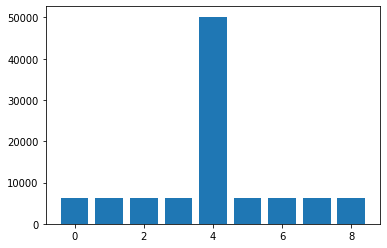

In [123]:
plt.bar(range(9), histCount)
histCountSum=sum(histCount)
histCountNorm=[]
for i in range(9):
  histCountNorm.append(histCount[i]/histCountSum )

<BarContainer object of 9 artists>

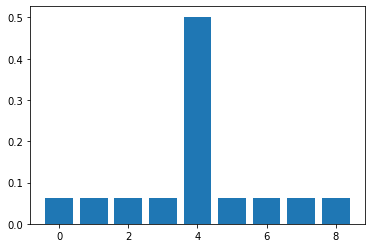

In [124]:
plt.bar(range(9), histCountNorm)

Questão 2:

In [125]:
import numpy as np
import math

In [126]:
J=1.0
N=10
k= 1
tabuleiro = np.ones((N,N))

In [127]:
def passo(beta):
  x=random.randint(0,N-1)
  y=random.randint(0,N-1)
  s=tabuleiro[x][y]
  sum = tabuleiro[(x+1)%N][y]+tabuleiro[(x-1)%N][y]+tabuleiro[x][(y+1)%N]+tabuleiro[x][(y-1)%N]
  deltaE=2*J*tabuleiro[x][y]*sum
  if deltaE<=0:
    tabuleiro[x][y]*=-1
    return deltaE
  elif random.random()<=math.exp(-beta * deltaE):
    tabuleiro[x][y]*=-1
    return deltaE
  return 0

In [128]:
def sweep(beta):
  deltaE=0
  for i in range(N*N):
    deltaE+=passo(beta)
  return deltaE

In [129]:
def magnetizacao_calc():
  return tabuleiro.sum()/(N*N)

In [130]:
def historia(T, tempo):
  if T==0:
    beta=float('inf')
  else:
    beta=1/(T*k)
  print(beta)
  magnetizacao = []
  for i in range(tempo):
    sweep(beta)
    magnetizacao.append(magnetizacao_calc())
  return magnetizacao

vamos gerar 4 simulações com T=2

In [131]:
t=100
tabuleiro = np.ones((N,N))
m1=historia(2,t)


0.5


In [132]:
t=500
tabuleiro = np.ones((N,N))
m1=historia(2,t)
tabuleiro = np.ones((N,N))
m2=historia(2,t)
tabuleiro = np.ones((N,N))
m3=historia(2,t)
tabuleiro = np.ones((N,N))
m4=historia(2,t)




0.5
0.5
0.5
0.5


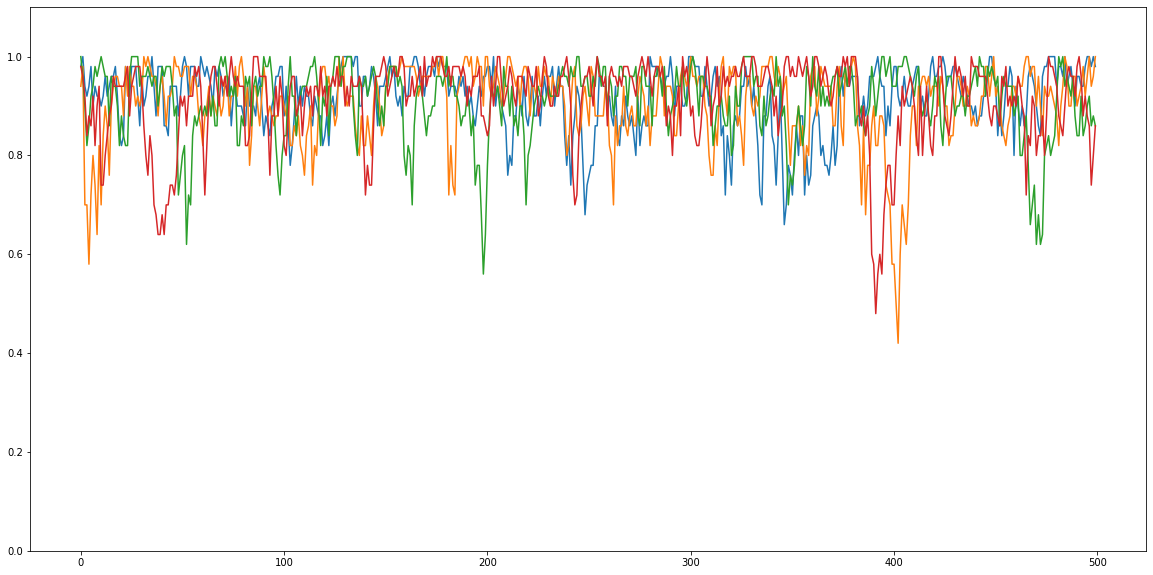

In [133]:
plt.figure(figsize=(20,10))
plt.ylim(0.0,1.1)
plt.plot(m1)
plt.plot(m2)
plt.plot(m3)
plt.plot(m4)

In [134]:
print(np.asarray(m3).mean())

0.91184


Vamos considerar que ele chega no equilíbrio por volta de 150
Agora vamos gerar uma nova história com 1150 e vamos calcular o error plot dos 1000 últimos valores

In [135]:
t=1500
tabuleiro = np.ones((N,N))
m1=np.asarray(historia(2,t)[150:])
tabuleiro = np.ones((N,N))
m2=np.asarray(historia(2,t)[150:])
tabuleiro = np.ones((N,N))
m3=np.asarray(historia(2,t)[150:])
tabuleiro = np.ones((N,N))
m4=np.asarray(historia(2,t)[150:])


0.5
0.5
0.5
0.5


In [136]:
mean1 = np.mean(m1)
std1 = np.std(m1)
mean2 = np.mean(m2)
std2 = np.std(m2)
mean3 = np.mean(m3)
std3 = np.std(m3)
mean4 = np.mean(m4)
std4 = np.std(m4)

labels=["m1","m2","m3","m4"]

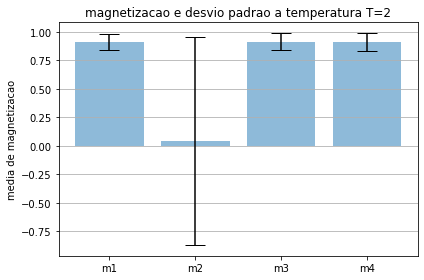

In [137]:
fig, ax = plt.subplots()
x_pos = np.arange(len(labels))
CTEs = [mean1, mean2, mean3, mean4]
error = [std1, std2, std3, std4]
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('media de magnetizacao')

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('magnetizacao e desvio padrao a temperatura T=2')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()


Agora vamos testar com 4 temperaturas diferentes

In [138]:
t=600
tabuleiro = np.ones((N,N))
m1=historia(0.5,t)
tabuleiro = np.ones((N,N))
m2=historia(1,t)
tabuleiro = np.ones((N,N))
m3=historia(1.5,t)
tabuleiro = np.ones((N,N))
m4=historia(2,t)
tabuleiro = np.ones((N,N))
m5=historia(2.5,t)
tabuleiro = np.ones((N,N))
m6=historia(3,t)
tabuleiro = np.ones((N,N))
m7=historia(3.5,t)



2.0
1.0
0.6666666666666666
0.5
0.4
0.3333333333333333
0.2857142857142857


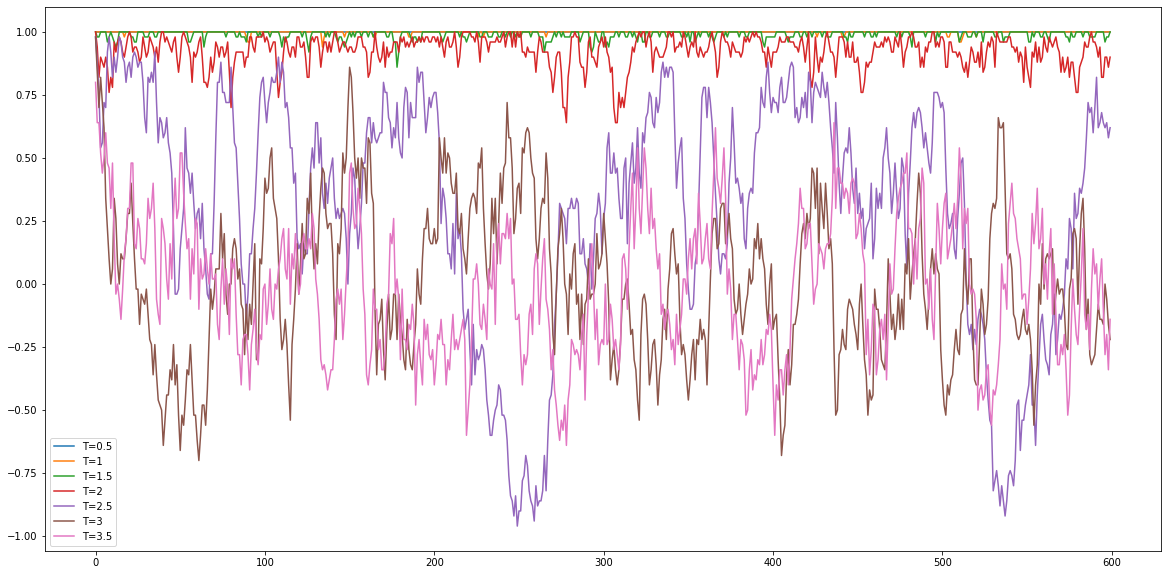

In [139]:
plt.figure(figsize=(20,10))
plt.plot(m1, label="T=0.5")
plt.plot(m2, label="T=1")
plt.plot(m3, label="T=1.5")
plt.plot(m4, label="T=2")
plt.plot(m5, label="T=2.5")
plt.legend()
plt.plot(m6, label="T=3")
plt.legend()
plt.plot(m7, label="T=3.5")
plt.legend()

Vou considerar que estabiliza a 250

In [140]:
t=1050
tabuleiro = np.ones((N,N))
m1=np.asarray(historia(0.5,t)[50:])
tabuleiro = np.ones((N,N))
m2=np.asarray(historia(1,t)[50:])
tabuleiro = np.ones((N,N))
m3=np.asarray(historia(1.5,t)[50:])
tabuleiro = np.ones((N,N))
m4=np.asarray(historia(2,t)[50:])
tabuleiro = np.ones((N,N))
m5=np.asarray(historia(2.5,t)[50:])
tabuleiro = np.ones((N,N))
m6=np.asarray(historia(3,t)[50:])
tabuleiro = np.ones((N,N))
m7=np.asarray(historia(3.5,t)[50:])

2.0
1.0
0.6666666666666666
0.5
0.4
0.3333333333333333
0.2857142857142857


In [141]:
mean1 = np.mean(m1)
std1 = np.std(m1)
mean2 = np.mean(m2)
std2 = np.std(m2)
mean3 = np.mean(m3)
std3 = np.std(m3)
mean4 = np.mean(m4)
std4 = np.std(m4)
mean5 = np.std(m5)
std5 = np.std(m5)
mean6 = np.std(m6)
std6 = np.std(m6)
mean7 = np.std(m7)
std7 = np.std(m7)



labels=["T=0.5","T=1","T=1.5","T=2","T=2.5", "T=3", "T=3.5"]

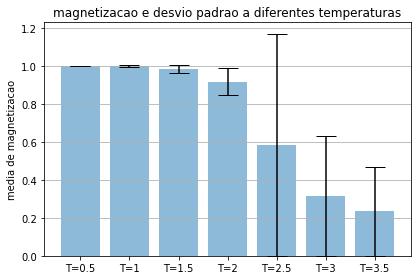

In [142]:
fig, ax = plt.subplots()
x_pos = np.arange(len(labels))
CTEs = [mean1, mean2, mean3, mean4, mean5, mean6, mean7]
error = [std1, std2, std3, std4, std5, std6, std7]
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('media de magnetizacao')

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('magnetizacao e desvio padrao a diferentes temperaturas')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()


Agora vamos estimar a temperatura crítica, e também vamos criar uma funçõ para energia e calcular c(T), por fim vamos estimar c(T) máximo

Primeiro vamos estimar a temperatura crítica fazendo diversas simulações entre 2.0 e 2.5 já que pelo nosso gráfico anterior ela parece estar por aqui

In [143]:
t=1100
Temps=[]
m1=[]
m2=[]
std1=[]
std2=[]
for i in range(10):
  Temps.append(2.0+i/20)
  tabuleiro = np.ones((N,N))
  m1.append(np.asarray(historia(Temps[i],t)[100:]))
  std1.append(np.std(m1[i]))
  tabuleiro = np.ones((N,N))
  m2.append(np.asarray(historia(Temps[i],t)[100:]))
  std2.append(np.std(m2[i]))


0.5
0.5
0.48780487804878053
0.48780487804878053
0.47619047619047616
0.47619047619047616
0.46511627906976744
0.46511627906976744
0.45454545454545453
0.45454545454545453
0.4444444444444444
0.4444444444444444
0.4347826086956522
0.4347826086956522
0.425531914893617
0.425531914893617
0.4166666666666667
0.4166666666666667
0.4081632653061224
0.4081632653061224


2.25


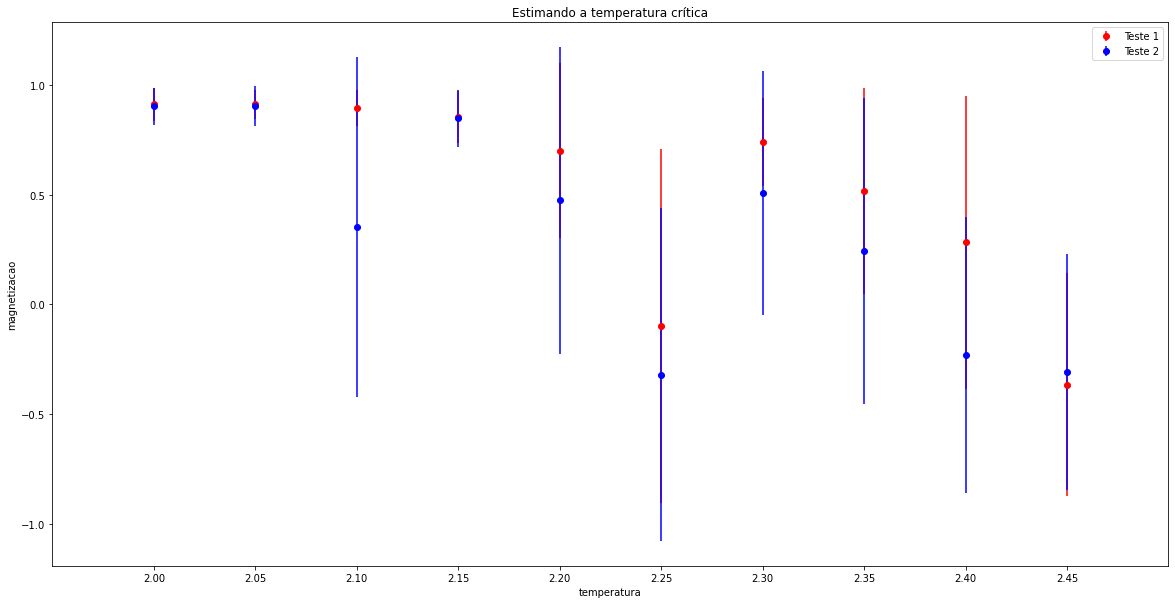

In [144]:
plt.figure(figsize=(20,10))
plt.xlim((1.95,2.5))
plt.xticks(np.arange(2,2.5,step=0.05))

plt.errorbar(Temps[0], np.mean(m1[0]), std1[0], fmt='ro', label='Teste 1')
plt.errorbar(Temps[0], np.mean(m2[0]), std2[0], fmt='bo', label='Teste 2')

for i in range(1,10):
  plt.errorbar(Temps[i], np.mean(m1[i]), std1[i], fmt='ro')
  plt.errorbar(Temps[i], np.mean(m2[i]), std2[i], fmt='bo')
plt.xlabel("temperatura")
plt.ylabel("magnetizacao")
plt.title("Estimando a temperatura crítica")
plt.legend()

print(2+np.argmax(np.asarray(std1)+np.asarray(std2))/20)


Pelo gráfico podemos ver que temos o maior desvio padrão próxmo da temperatura de 2.3

In [145]:
def Energia(tabela):
  E=0
  for i in range(N):
    for j in range(N):
      sum = tabela[(i+1)%N][j]+tabela[(i-1)%N][j]+tabela[i][(j+1)%N]+tabela[i][(j-1)%N]
      E+=tabela[i][j]*sum
  return -E/2
                                                        

In [146]:
Energia(np.ones((N,N)))

-200.0

In [147]:
def historiaDaEnergia(T, tempo):
  if T==0:
    beta=float('inf')
  else:
    beta=1/(T*k)
  E=Energia(tabuleiro)
  histE = []
  histE.append(E)
  print(beta)
  magnetizacao = []
  for i in range(tempo):
    E+=sweep(beta)
    #magnetizacao.append(magnetizacao_calc())
    histE.append(E)
  return histE

In [148]:
def calorEspecifico_calc(E, Temp):
  return (np.mean(E**2)-np.mean(E)**2)/(N*N*Temp*Temp)

In [149]:
def calorEspecifico(Temp,tik):
  tabuleiro=np.ones((N,N))
  E=np.asarray(historiaDaEnergia(Temp,1000+tik)[tik:])
  c1=calorEspecifico_calc(E,Temp)
  tabuleiro=np.ones((N,N))
  E=np.asarray(historiaDaEnergia(Temp,1000+tik)[tik:])
  c2=calorEspecifico_calc(E,Temp)
  tabuleiro=np.ones((N,N))
  E=np.asarray(historiaDaEnergia(Temp,1000+tik)[tik:])
  c3=calorEspecifico_calc(E,Temp)

  return (c1+c2+c3)/3

In [150]:
calorEspecifico(2,100)

0.5
0.5
0.5


0.717399869527744

In [156]:
caloresEspecificos=[]
for i in np.arange(0.5,4,0.1):
  caloresEspecificos.append(calorEspecifico(i,100))


2.0
2.0
2.0
1.6666666666666667
1.6666666666666667
1.6666666666666667
1.4285714285714286
1.4285714285714286
1.4285714285714286
1.25
1.25
1.25
1.1111111111111112
1.1111111111111112
1.1111111111111112
1.0000000000000002
1.0000000000000002
1.0000000000000002
0.9090909090909092
0.9090909090909092
0.9090909090909092
0.8333333333333335
0.8333333333333335
0.8333333333333335
0.7692307692307694
0.7692307692307694
0.7692307692307694
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.6250000000000001
0.6250000000000001
0.6250000000000001
0.5882352941176472
0.5882352941176472
0.5882352941176472
0.5555555555555556
0.5555555555555556
0.5555555555555556
0.5263157894736843
0.5263157894736843
0.5263157894736843
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.4761904761904763
0.4761904761904763
0.4761904761904763
0.4545454545454546
0.4545454545454546
0.4545454545454546
0.4347826086956522
0.4347826086956522
0.4347826086956522
0.41

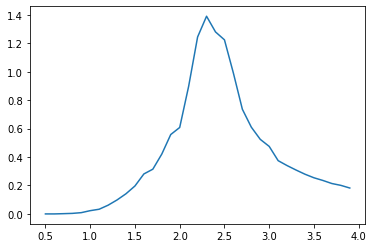

In [157]:
x=np.arange(0.5,4,step=.1)
plt.plot(x, caloresEspecificos)

In [158]:
print(x[np.argmax(caloresEspecificos)])

2.3
